In [1]:
import random as rd
import seaborn as sns
import numpy as np
from heapq import heappush, heappop

# Introduction à la simulation et simulation à événements discrets

---


Références:
* *The Art of Computer Systems Performance Analysis*, Ray Jain, https://www.cse.wustl.edu/~jain/books/perf_sli.htm

* *Simulation*, Sheldon Ross


## Motivation

---

Comprendre le comportement  d'un système dynamique.



**Méthodes possibles:**
* Expérimentation réelle 
* Modélisation et analyse et/ou simulation.

**Modèle**: représentation d'un système réel dont on a sélectionné les caractéristiques clefs pour sa dynamique.

**Simulation**: expérience faite par ordinateur où l'environnement réel est remplacé par l'exécution d'un programme.


### Classification

---

* évolution à des temps **discrets**, ou **continue**

* espace d'état discret ou continu

* Modélisation **déterministe** ou **stochastique**

* horizon **fini** ou **infini**

* environnement **stationnaire** ou  **asymptotiquement stationnaire** ou **non stationnaire**: simulation de Monte-Carlo vs simulation d'une chaîne de Markov ergodique ou non. 

Dans ce cours:
* temps et états discrets
* environnement stochastique
* horizon infini (comportement moyen au cours du temps)
* environnement asymptotiquement stationnaire

### Contenus de l'UE

---

* simulation à événements discrets (SED)
    * modélisation des états et des événements
    * structure d'un SED
    * critère d'arrêt
    * présentation et analyse des résultats
* simulation de Monte Carlo
* simulation du hasard
* analyse des modèles mathématiques
    * chaînes de Markov
    * files d'attente


### Un exemple à simuler

---

Temps discret: dates 0,1,2,...

A un arrêt de bus, à chaque instant:
* un bus a la probabilité $p_b$ de passer, indépendamment du passé et du nombre de voyageurs
* un voyageur a la proba $p_v$ d'arriver, indépendamment du passé

Quand un bus arrive, il emmène tous les voyageurs présents à l'arrêt de bus, y compris celui qui arrive au même moment que le bus.




**Questions typiques**:

* fréquence moyenne de passage du bus?
* délai moyen entre deux bus?
* nombre moyen de voyageurs en attente?
* temps moyen d'attente du bus par les voyageurs?

### Moyenne?

---

Quelle est la **vitesse moyenne** d'un cycliste sur un parcours
* s'il roule la moitié du **temps** à $10 \, km/h$ et l'autre moitié à $20 \, km/h$?
* s'il roule la moitié de la **distance** à $10 \, km/h$ et l'autre moitié à $20 \, km/h$?

Formule de la vitesse moyenne:

$$\bar{v} = \frac1T \int_0^T v(t) dt = \frac{\text{distance totale}}{\text{temps total}} $$
où $v(t)$ est la vitesse instantanée à l'instant $t$.

On intègre par rapport au temps et non la position.

### Quelle moyenne?

---

Soit $(X_k)_{k \in \mathbb{N}}$ une suite de variables aléatoires réelles. Considérons:


a.
$M_n = \frac1n (X_0 + X_1 + \dots + X_{n-1})  $

b. 
$ \mathbb{E}[M_n] $

c. 
$ \lim_{n \rightarrow \infty} M_n $

d. 
$ \mathbb{E}[\lim_{n \rightarrow \infty} M_n ]$

e. 
$ \lim_{n \rightarrow \infty} \mathbb{E}[M_n] $






* **loi des grands nombres**: si $(X_k)_{k \in \mathbb{N}}$ sont iid alors $b$, $c$, $d$ et $e$ sont égaux et valent $ \mathbb{E}[X_0] $

* **théorème ergodique**: si $(X_k)_{k \in \mathbb{N}}$ est une chaîne de Markov ergodique, $c$, $d$ et $e$ sont égaux.

Une simulation calcule $M_n$ et estime $\mathbb{E}[M_n]$.

**Difficulté**: on veut estimer des grandeurs sur un temps infini avec un temps de simulation fini.

### Retour sur l'exemple

---

Temps discret: dates 0,1,2,...

A un arrêt de bus, à chaque instant:
* un bus a la probabilité $p_b$ de passer, indépendamment du passé et du nombre de voyageurs
* un voyageur a la proba $p_v$ d'arriver, indépendamment du passé

Quand un bus arrive, il emmène tous les voyageurs présents à l'arrêt de bus, y compris celui qui arrive au même moment que le bus.


### Mesure de la fréquence moyenne (taux) de passage du bus

---

$$ \frac1T \sum_{t=0}^{T-1} B(t) $$
où $B(t)$ vaut 1 avec probabilité $p_b$ et 0 sinon.

### Délai moyen entre deux bus

---

$$ \frac1n \sum_{i=1}^{n}D_i^b  $$


où $D_i^b$ est le delai avant l'arrivée du $i$-ème bus
$$D_i^b = T_i^b - T_{i-1}^b $$
et $T_i^b$ est la date d'arrivée du i-ème bus
$$T_i^b = \min \{ n \geq 0:  \sum_{t=0}^{n-1} B(t) \geq i\}$$



### Nombre moyen de voyageurs en attente

---

$$ \frac1T \sum_{t=0}^{T-1} N(t) $$
où $N(t)$ est le nombre de voyageurs à la date $t$.




### Temps d'attente moyen du bus par les voyageurs

---

$$ \frac1n \sum_{i=1}^{n}D_i^v  $$
où $D_i^v$ est le temps d'attente du i-ème voyageur
$$D_i^v = \min_{j \geq 1}\{T_j^b : T_j^b \geq T_i^v \} - T_{i}^v $$
et $T_i^v$ est la date d'arrivée du i-ème voyageur.



### Un premier programme

---




In [14]:
# les constantes
T_MAX = 100 # temps max de simulation
PB = 0.2 # proba arrivée bus
PV = 0.5 # proba arrivée voyageur

# les variables
t = 0 # temps
t_bus = [] # liste des dates d'arrivée des bus
t_voy = [] # liste des dates d'arrivée des voyageurs
nb_v = [0] # liste du nombre de voyageurs au cours du temps

In [7]:
def arrive(p):
    """Retourne True si une arrivée avec proba p"""
    return rd.random() < p

In [15]:
while t < T_MAX:
    nb_v.append(nb_v[-1])
    if arrive(PV):
        t_voy.append(t)
        nb_v[-1] += 1
    if arrive(PB):
        t_bus.append(t)
        nb_v[-1] = 0
    t += 1

### Evolution du nombre de voyageurs en attente

---


<Axes: >

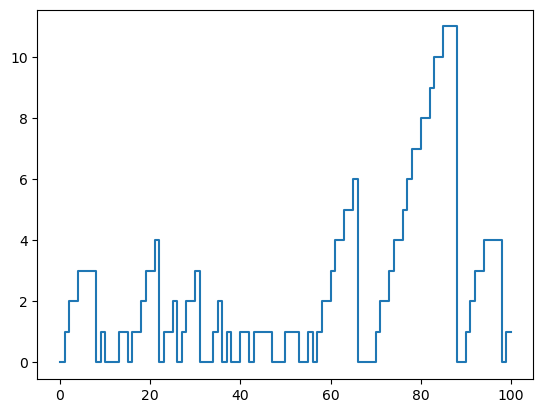

In [16]:
sns.lineplot(nb_v, drawstyle='steps-pre')

### Calcul des moyennes

---



In [17]:
# nb bus arrivés
n_b = len(t_bus)
# nb voyageurs arrivés
n_v = len(t_voy)
# liste des délais entre 2 bus
delai_bus = [t_bus[i+1] - t_bus[i] for i in range(n_b-1)]
delai_voy = [ sum([t_bus[i] - t_voy[j] for j in range(n_v) if t_bus[i-1] < t_voy[j] <= t_bus[i] ]) for i in range(1,n_b-1)]

print("Fréquence moyenne de passage du bus:", "{:.2f}".format(n_b / T_MAX))
print("Temps moyen entre deux passages de bus", "{:.2f}".format(sum(delai_bus) / (n_b-1))) 
print("Nombre moyen de voyageurs", "{:.2f}".format(sum(nb_v) / T_MAX))
print("Temps moyen d'attente", "{:.2f}".format(sum(delai_voy) / n_v))

Fréquence moyenne de passage du bus: 0.16
Temps moyen entre deux passages de bus 6.00
Nombre moyen de voyageurs 2.37
Temps moyen d'attente 3.96


### Deuxième programme (simulateur à événements discrets)

---

**Remarques**: 

* les durées entre les arrivées des bus et des clients suivent une loi géométrique de paramètre $p_b$ et $p_v$

$$\forall n \geq1, \mathbb{P}[T = n] = (1-p)^{n-1} p  $$

* inutile de simuler ce qui se passe entre 2 événements



In [18]:
def duree_bus(p):
    return np.random.geometric(p)
    
def duree_voy(p):
    return np.random.geometric(p)


In [20]:
# les constantes
T_MAX = 100 # temps max de simulation
PB = 0.2 # proba arrivée bus
PV = 0.5 # proba arrivée voyageur

# les variables
t = 0 # temps
n_b = 0 # nombre de bus arrivés
n_v = 0 # nombre de voyageurs arrivés
n = 0 # nombre de voyageurs à chaque date
n_cumul = 0 # nombre cumulé de voyageurs
echeancier = [] # contient les événements à venir
# On initialise l'échéancier en calculant la date de première arrivée d'un bus et d'un voyageur
heappush(echeancier, (duree_bus(PB),"2bus"))
heappush(echeancier, (duree_voy(PV),"1voy"))

In [21]:
while t < T_MAX:
    evt = heappop(echeancier)
    t2 = evt[0]
    n_cumul += (t2 - t) * n
    match evt[1]:
        case "2bus":
            heappush(echeancier, (t2 + duree_bus(PB),"2bus"))
            n_b += 1
            n = 0
        case "1voy":
            heappush(echeancier, (t2 + duree_voy(PV),"1voy"))
            n_v += 1
            n += 1
    t = t2

In [22]:
freq_b = n_b / T_MAX
freq_v = n_v / T_MAX
n_moyen = n_cumul / T_MAX
print("Fréquence moyenne de passage du bus:", "{:.2f}".format(freq_b))
print("Temps moyen entre deux passages de bus", "{:.2f}".format(1 / freq_b)) 
print("Nombre moyen de voyageurs", "{:.2f}".format(n_moyen))
print("Temps moyen d'attente", "{:.2f}".format(n_moyen / freq_v))

Fréquence moyenne de passage du bus: 0.26
Temps moyen entre deux passages de bus 3.85
Nombre moyen de voyageurs 1.13
Temps moyen d'attente 2.22


## Simulateur à événements discrets (SED)

---

Eléments d'un SED:

* **événements**
    * contiennent une date et un type au minimum
    * entrainent une transition quand ils sont traités: ils modifient les variables de simulation

* **horloge**
    * variable temps

* **échéancier**
    * variable qui contient les événements futurs, pas encore traités

* **autres variables**
    * codent l'état du système (modélisation)
    * permettent la mesure de statistiques


### Structure d'un SED

---

```
Initialiser les variables

TANT QUE critere de continuation:
    extraire l'événement avec la plus petite date
    traiter l'événement en mettant à jour les variables de simulation

Calculer statistiques finales et produire un rapport
```

### Echéancier

---

**Opérations requises pour l'échéancier**:

* insérer un événement
* extraire l'événement avec la plus petite date

Ces opérations sont effectuées un grand nombre de fois.


Quelle structure de donnée?

**Type abstrait**: 
* file de priorité

**Implémentation**: 
* par un tas
* librairie ```heapq``` en python par exemple
* coût algorithmique des opérations $O(\log \, n)$, avec $n$ le nombre d'événements dans l'échéancier

## Analyse mathématique de l'exemple

---


#### Fréquence moyenne de passage du bus

---

$$ \lim_{n \rightarrow \infty} \frac1n \sum_{t=0}^{n-1} B(t) $$
où $B(t)$ vaut 1 avec probabilité $p_b$ et 0 sinon.




* vaut $\mathbb{E}[B(0)]$ par la loi des grands nombres
* et $\mathbb{E}[B(0)] = p_b = 0.2$

#### Délai moyen entre deux bus

---

$$ \lim_{n \rightarrow \infty} \frac1n \sum_{i=1}^{n}D_i^b  $$
où $D_i^b$ est le delai avant l'arrivée du i-ème bus.


* vaut $\mathbb{E}[D_1^b]$ par la loi des grands nombres, or $D_1^b$ suit la loi géométrique de paramètre $p_b$
* donc $\mathbb{E}[D_1^b] = \frac{1}{p_b} = 5$

#### Nombre moyen de voyageurs

--- 

$$ \lim_{n \rightarrow \infty} \frac1n \sum_{t=0}^{n-1} N(t) $$
où $N(t)$ est le nombre de voyageurs à la date $t$.


* $N(t)$ est une chaîne de Markov sur $\mathbb{N}$ dont le graphe de la chaîne est donné par le graphe qui suit.
<center><img src='fig/chaine_n.png'"></center> 





* par le théorème ergodique (généralisé aux espaces infinis), 
$$ \lim_{n \rightarrow \infty} \frac1n \sum_{t=0}^{n-1} N(t) = \sum_{i \in \mathbb{N}} i \pi(i)$$
avec 
$$\pi(i) = r^i(1-r) $$
et
$$r = \frac{p_v(1-q_b)}{p_v(1-q_b) + q_b} $$
ce qui donne
$$ \lim_{n \rightarrow \infty} \frac1n \sum_{t=0}^{n-1} N(t) = \frac{r}{1-r} = 2$$



#### Temps moyen d'attente du bus par les voyageurs

---

$$ D^v = \lim_{n \rightarrow \infty} \frac1n \sum_{i=1}^{n}D_i^v  $$
où $D_i^v$ est le temps d'attente du i-ème voyageur.

* pas clair si les $(D_i^v)_i$ sont indépendants donc pas de loi des grands nombres

* par la **loi de Little** on a

$$ D^v = \frac{n_{\text{moy}}}{p_v}  = 4 $$

## Loi de Little

---

On considère un système où des objets arrivent, restent un certain temps, puis sortent.

* $\bar{N}$ est le nombre moyen d'objets
* $\bar{D}$ est la durée moyenne passé dans le système par un objet
* $\lambda$ est la fréquence d'arrivée des objets

$$ \bar{N} = \lambda \bar{D} $$

Preuve au tableau dans le cas où le système est vide au début et à la fin.

**Remarque**: on ne fait aucune hypothèse probabiliste sur le processus d'arrivée.

### Exemples d'application de la loi de Little

---

* supposons que quand un bus arrive, il reste à l'arrêt jusqu'à ce que le bus suivant arrive
    * $\bar{N}$: le nombre moyen de bus est 1
    * $\lambda$: la fréquence d'arrivée des bus est 0.2
    * donc $\bar{D}$, le temps de séjour moyen d'un bus vaut $\bar{N} / \lambda = 5$
    * c'est la durée moyenne entre 2 arrivées de bus 

* dans l'exemple, quel est le nombre moyen de voyageurs si les bus arrivent de manière régulière tous les 5 pas de temps?

## Quand terminer une simulation?

---


<Axes: >

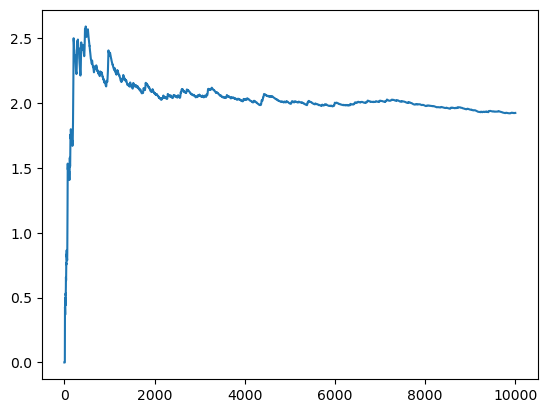

In [18]:
# les constantes
T_MAX = 10000 # temps max de simulation
PB = 0.2 # proba arrivée bus
PV = 0.5 # proba arrivée voyageur

# les variables
t = 0 # temps
n = 0 # nombre de voyageurs à chaque date
n_cumul = 0 # nombre cumulé de voyageurs
echeancier = [] # contient les événements à venir
# On initialise l'échéancier en calculant la date de première arrivée d'un bus et d'un voyageur
heappush(echeancier, (duree_bus(PB),"2bus"))
heappush(echeancier, (duree_voy(PV),"1voy"))
res = [] # pour l'affichage de l'évolution de la moyenne

while t < T_MAX:
    evt = heappop(echeancier)
    t2 = evt[0]
    res.append([t, n_cumul/(t+1)])
    n_cumul += (t2 - t) * n
    match evt[1]:
        case "2bus":
            heappush(echeancier, (t2 + duree_bus(PB),"2bus"))
            n = 0
        case "1voy":
            heappush(echeancier, (t2 + duree_voy(PV),"1voy"))
            n += 1
    t = t2

x_values, y_values = zip(*res)
sns.lineplot(x=x_values, y=y_values)

### Faire varier un paramètre

---

In [19]:
# les constantes
T_MAX = 100000 # temps max de simulation
PB = 0.2 # proba arrivée bus

def simul(p):
    """retourne le nb moyen de voyageurs en fonction de leur proba d'arrivée"""
    # les variables
    t = 0 # temps
    n = 0 # nombre de voyageurs à chaque date
    n_cumul = 0 # nombre cumulé de voyageurs
    echeancier = [] # contient les événements à venir
    # On initialise l'échéancier en calculant la date de première arrivée d'un bus et d'un voyageur
    heappush(echeancier, (duree_bus(PB),"2bus"))
    heappush(echeancier, (duree_voy(p),"1voy"))
    res = [] # pour l'affichage de l'évolution de la moyenne

    while t < T_MAX:
        evt = heappop(echeancier)
        t2 = evt[0]
        n_cumul += (t2 - t) * n
        match evt[1]:
            case "2bus":
                heappush(echeancier, (t2 + duree_bus(PB),"2bus"))
                n = 0
            case "1voy":
                heappush(echeancier, (t2 + duree_voy(p),"1voy"))
                n += 1
        t = t2
    return n_cumul / T_MAX

### Nombre moyen de voyageurs en attente en fonction de leur probabilité d'arrivée

---

<Axes: >

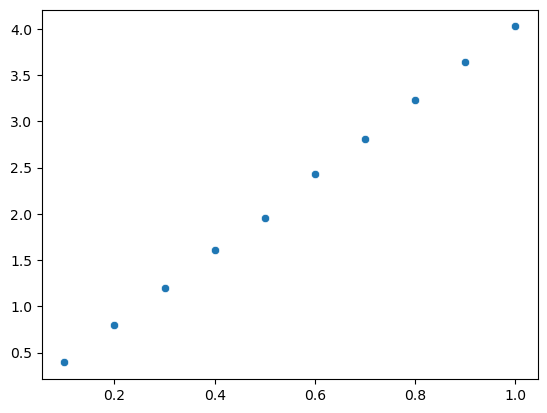

In [20]:
res = []
for i in range(1,11):
    p = i / 10
    res.append([p, simul(p)])
x_values, y_values = zip(*res)
sns.scatterplot(x=x_values, y=y_values)